Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 10)                30        
                                                                 
 dense_13 (Dense)            (None, 2)                 22        
                                                                 
Total params: 52 (208.00 Byte)
Trainable params: 52 (208.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/100
2/2 [==============================] - 0s 146ms/step - loss: 5.7178 - mae: 5.7178 - val_loss: 6.0310 - val_mae: 6.0310
Epoch 2/100
2/2 [==============================] - 0s 31ms/step - loss: 4.8520 - mae: 4.8520 - val_loss: 5.3169 - val_mae: 5.3169
Epoch 3/100
2/2 [==============================] - 0s 31ms/step - loss: 4.1556 - mae: 4.1556 - val_loss: 5.0190 - val_mae: 5.0190
Epoch 4/100
2/2 [======

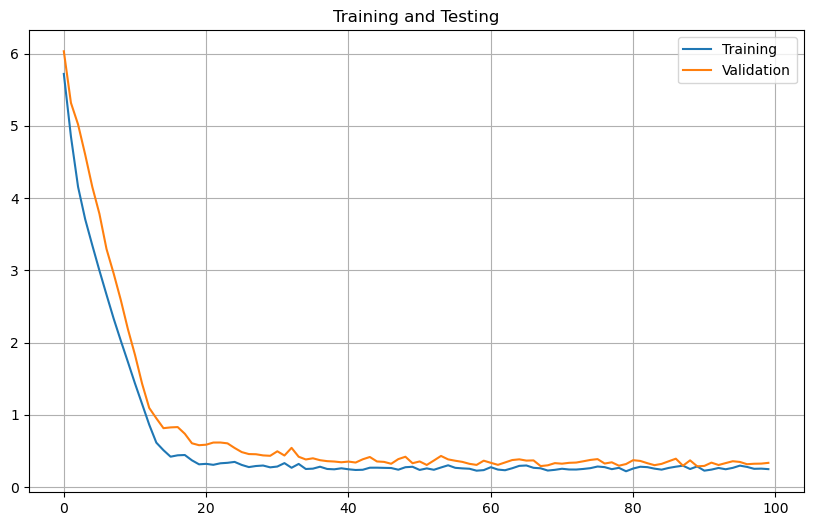

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Function of Two Variables
def func(x):
    y = np.cos(x[0]) / x[1] - np.sin(x[0]) / x[1]**2
    z = np.sin(x[0] / 2) + y * np.sin(x[0])
    return y, z

# Collecting Dataset
x = np.linspace(12, 19, 7)
x0, x1 = np.meshgrid(x, x)
x0, x1 = x0.ravel(), x1.ravel()
X = [[x0[i], x1[i]] for i in range(len(x0))]
y, z = zip(*[func(x) for x in X])

split = int(len(X) * 0.8)
x_train, y_train, z_train = X[:split], y[:split], z[:split]
x_test, y_test, z_test = X[split:], y[split:], z[split:]

# Function to display
def visual(his):
    loss = his.history['loss']
    val_loss = his.history['val_loss']
    epochs = range(len(loss))
    
    plt.figure(figsize=(10, 6))
    plt.plot(epochs, loss, label='Training')
    plt.plot(epochs, val_loss, label='Validation')
    plt.title('Training and Testing')
    plt.legend()
    plt.grid()
    plt.show()

# Model with 1 inner layer and 10 neurons
model_fl = tf.keras.models.Sequential([
    tf.keras.layers.Dense(10, input_shape=(2,), activation='relu'),
    tf.keras.layers.Dense(2)  # Two outputs for y and z
])

model_fl.summary()

model_fl.compile(
    optimizer=tf.keras.optimizers.SGD(
        learning_rate=tf.keras.optimizers.schedules.ExponentialDecay(0.001, decay_steps=75, decay_rate=0.96)
    ),
    loss='mae',
    metrics=['mae']
)

# Train the model
history_f = model_fl.fit(
    np.array(x_train), np.array([y_train, z_train]).T,  # Two outputs
    epochs=100,
    validation_data=(np.array(x_test), np.array([y_test, z_test]).T),
)

# Display learning curves
visual(history_f)
